In [3]:
import datetime
import pandas as pd
import pymongo
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [81]:
client = pymongo.MongoClient('10.18.6.26',27001)
collection = client['db_parker']['xueqiu_reward']
ret = collection.find({})

In [82]:
df = pd.DataFrame(list(ret))

In [89]:
df[['user_id','name','description','amount','created_at','been_reward']][:10]

,user_id,name,description,amount,created_at,been_reward
0,1564420196,金王山而,20多年的证券从业经历，专业投资人。,10.00,2018-10-23 08:46:39,元卫南
1,3718535810,天天盈8,,6.00,2018-10-23 00:32:52,元卫南
2,3951010629,正义的大公,彩票、游戏行业！,1.00,2018-10-23 12:23:06,元卫南
3,3604329223,孤者自品,热爱金融，热爱生活，自利利他！,1.00,2018-10-23 10:56:24,元卫南
4,8529649724,张洪昌哥,None,1.00,2018-10-23 07:06:38,元卫南
5,1651525424,15921355678aaa,None,1.00,2018-10-23 01:46:17,元卫南
6,1471202951,zkkJin,None,1.00,2018-10-23 00:27:21,元卫南
7,1564420196,金王山而,20多年的证券从业经历，专业投资人。,10.00,2018-10-22 23:20:00,元卫南
8,5226456816,2020那年冬天,None,8.88,2018-10-22 19:52:50,元卫南
9,6489197122,深篮,None,1.00,2018-10-22 23:25:10,元卫南


In [90]:
del df['_id']

In [80]:
df.head(20)

,amount,been_reward,created_at,description,name,user_id
pub_date,,,,,,
2018-10-23 08:46:39,10.00,元卫南,2018-10-23 08:46:39,20多年的证券从业经历，专业投资人。,金王山而,1564420196
2018-10-23 00:32:52,6.00,元卫南,2018-10-23 00:32:52,,天天盈8,3718535810
2018-10-23 12:23:06,1.00,元卫南,2018-10-23 12:23:06,彩票、游戏行业！,正义的大公,3951010629
2018-10-23 10:56:24,1.00,元卫南,2018-10-23 10:56:24,热爱金融，热爱生活，自利利他！,孤者自品,3604329223
2018-10-23 07:06:38,1.00,元卫南,2018-10-23 07:06:38,None,张洪昌哥,8529649724
2018-10-23 01:46:17,1.00,元卫南,2018-10-23 01:46:17,None,15921355678aaa,1651525424
2018-10-23 00:27:21,1.00,元卫南,2018-10-23 00:27:21,None,zkkJin,1471202951
2018-10-22 23:20:00,10.00,元卫南,2018-10-22 23:20:00,20多年的证券从业经历，专业投资人。,金王山而,1564420196
2018-10-22 19:52:50,8.88,元卫南,2018-10-22 19:52:50,None,2020那年冬天,5226456816


In [91]:
df['pub_date']=pd.to_datetime(df['created_at'])

In [92]:
df = df.set_index('pub_date',drop=True)

In [95]:
df.head(10)

,amount,been_reward,created_at,description,name,user_id
pub_date,,,,,,
2018-10-23 08:46:39,10.00,元卫南,2018-10-23 08:46:39,20多年的证券从业经历，专业投资人。,金王山而,1564420196
2018-10-23 00:32:52,6.00,元卫南,2018-10-23 00:32:52,,天天盈8,3718535810
2018-10-23 12:23:06,1.00,元卫南,2018-10-23 12:23:06,彩票、游戏行业！,正义的大公,3951010629
2018-10-23 10:56:24,1.00,元卫南,2018-10-23 10:56:24,热爱金融，热爱生活，自利利他！,孤者自品,3604329223
2018-10-23 07:06:38,1.00,元卫南,2018-10-23 07:06:38,None,张洪昌哥,8529649724
2018-10-23 01:46:17,1.00,元卫南,2018-10-23 01:46:17,None,15921355678aaa,1651525424
2018-10-23 00:27:21,1.00,元卫南,2018-10-23 00:27:21,None,zkkJin,1471202951
2018-10-22 23:20:00,10.00,元卫南,2018-10-22 23:20:00,20多年的证券从业经历，专业投资人。,金王山而,1564420196
2018-10-22 19:52:50,8.88,元卫南,2018-10-22 19:52:50,None,2020那年冬天,5226456816


In [97]:
df['2018-09']['amount'].sum()

2301.74

In [98]:
df_period = df.to_period('M')

In [99]:
df_period.head(10)

,amount,been_reward,created_at,description,name,user_id
pub_date,,,,,,
2018-10,10.00,元卫南,2018-10-23 08:46:39,20多年的证券从业经历，专业投资人。,金王山而,1564420196
2018-10,6.00,元卫南,2018-10-23 00:32:52,,天天盈8,3718535810
2018-10,1.00,元卫南,2018-10-23 12:23:06,彩票、游戏行业！,正义的大公,3951010629
2018-10,1.00,元卫南,2018-10-23 10:56:24,热爱金融，热爱生活，自利利他！,孤者自品,3604329223
2018-10,1.00,元卫南,2018-10-23 07:06:38,None,张洪昌哥,8529649724
2018-10,1.00,元卫南,2018-10-23 01:46:17,None,15921355678aaa,1651525424
2018-10,1.00,元卫南,2018-10-23 00:27:21,None,zkkJin,1471202951
2018-10,10.00,元卫南,2018-10-22 23:20:00,20多年的证券从业经历，专业投资人。,金王山而,1564420196
2018-10,8.88,元卫南,2018-10-22 19:52:50,None,2020那年冬天,5226456816


In [26]:
df_period.index.asfreq('M')

PeriodIndex(['2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10',
             ...
             '2016-07', '2016-07', '2016-07', '2016-07', '2016-07', '2016-07',
             '2016-07', '2016-07', '2016-07', '2016-07'],
            dtype='period[M]', name='pub_date', length=4222, freq='M')

In [101]:
df.resample('M')['amount'].sum()

pub_date
2016-07-31      108.00
2016-08-31       30.00
2016-09-30        0.00
2016-10-31        0.00
2016-11-30       20.68
2016-12-31        2.00
2017-01-31       18.54
2017-02-28      209.76
2017-03-31       18.60
2017-04-30       61.00
2017-05-31      657.70
2017-06-30      172.71
2017-07-31      113.88
2017-08-31      497.83
2017-09-30      128.80
2017-10-31      359.89
2017-11-30      410.70
2017-12-31      235.00
2018-01-31       16.84
2018-02-28       23.71
2018-03-31       76.46
2018-04-30      310.07
2018-05-31     2571.84
2018-06-30      333.97
2018-07-31      552.25
2018-08-31      867.22
2018-09-30     2301.74
2018-10-31    14028.94
Freq: M, Name: amount, dtype: float64

In [69]:
result

pub_date
2016-07-31      108.00
2016-08-31       30.00
2016-09-30        0.00
2016-10-31        0.00
2016-11-30       20.68
2016-12-31        2.00
2017-01-31       18.54
2017-02-28      209.76
2017-03-31       18.60
2017-04-30       61.00
2017-05-31      657.70
2017-06-30      172.71
2017-07-31      113.88
2017-08-31      497.83
2017-09-30      128.80
2017-10-31      359.89
2017-11-30      410.70
2017-12-31      235.00
2018-01-31       16.84
2018-02-28       23.71
2018-03-31       76.46
2018-04-30      310.07
2018-05-31     2571.84
2018-06-30      333.97
2018-07-31      552.25
2018-08-31      867.22
2018-09-30     2301.74
2018-10-31    14028.94
Freq: M, Name: amount, dtype: float64

In [ ]:
result.sum()

In [68]:
list(result.index.values)

[numpy.datetime64('2016-07-31T00:00:00.000000000'),
 numpy.datetime64('2016-08-31T00:00:00.000000000'),
 numpy.datetime64('2016-09-30T00:00:00.000000000'),
 numpy.datetime64('2016-10-31T00:00:00.000000000'),
 numpy.datetime64('2016-11-30T00:00:00.000000000'),
 numpy.datetime64('2016-12-31T00:00:00.000000000'),
 numpy.datetime64('2017-01-31T00:00:00.000000000'),
 numpy.datetime64('2017-02-28T00:00:00.000000000'),
 numpy.datetime64('2017-03-31T00:00:00.000000000'),
 numpy.datetime64('2017-04-30T00:00:00.000000000'),
 numpy.datetime64('2017-05-31T00:00:00.000000000'),
 numpy.datetime64('2017-06-30T00:00:00.000000000'),
 numpy.datetime64('2017-07-31T00:00:00.000000000'),
 numpy.datetime64('2017-08-31T00:00:00.000000000'),
 numpy.datetime64('2017-09-30T00:00:00.000000000'),
 numpy.datetime64('2017-10-31T00:00:00.000000000'),
 numpy.datetime64('2017-11-30T00:00:00.000000000'),
 numpy.datetime64('2017-12-31T00:00:00.000000000'),
 numpy.datetime64('2018-01-31T00:00:00.000000000'),
 numpy.datet

In [63]:
list(result.values)

[108.0,
 30.0,
 0.0,
 0.0,
 20.68,
 2.0,
 18.54,
 209.76,
 18.6,
 61.0,
 657.6999999999999,
 172.70999999999998,
 113.88,
 497.83000000000004,
 128.8,
 359.89,
 410.70000000000005,
 235.0,
 16.84,
 23.71,
 76.46000000000001,
 310.07,
 2571.84,
 333.97,
 552.2500000000001,
 867.2199999999999,
 2301.7400000000007,
 14028.939999999962]

<BarContainer object of 28 artists>

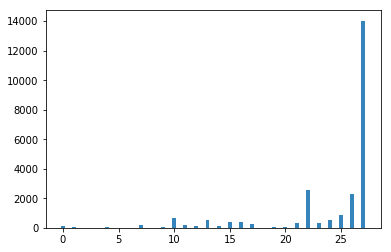

In [65]:
plt.bar(range(0,len(result)),list(result.values),alpha=0.9, width = 0.35)


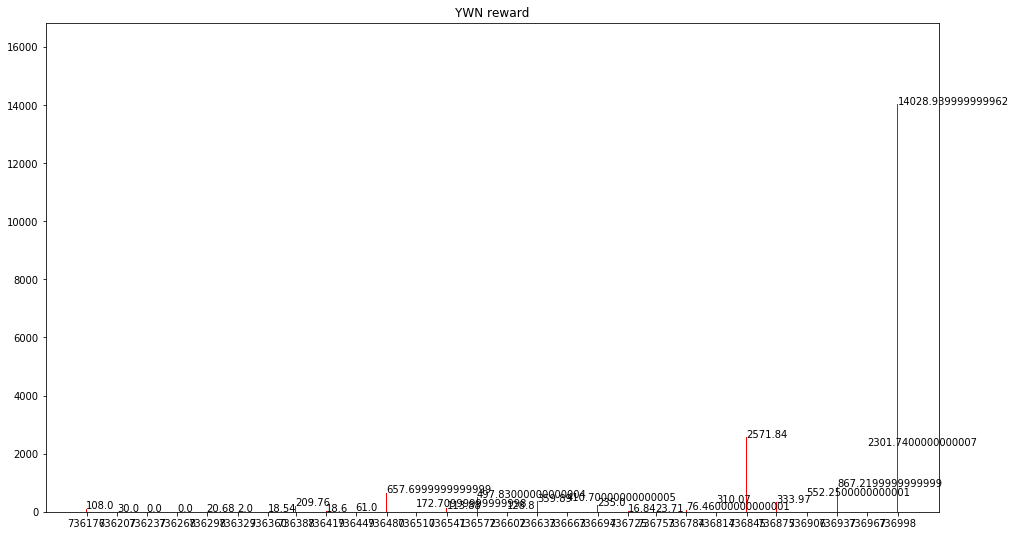

In [103]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x(), 1*height, '%s'%height)
fig = plt.figure(figsize=(16,9))
plt.title('YWN reward')
x=result.index.values
y=result.values
plt.xticks(x[::1])
plt.ylim((0,max(y)+max(y)*0.2))
rect=plt.bar(x,y,width=0.5, align='center',color='r')
autolabel(rect)

In [1]:
id_list =[]
created_list =[]
desc_list =[]

for i in ret:
    post_id = i.get('_id')
#     print(post_id,)
    id_list.append(post_id)
    created_time = i.get('created_at')
#     print(created_time,)
    created_list.append(created_time)
    description = i.get('description')
    desc_list.append(description)


len(id_list)

len(created_list)


df = pd.DataFrame({'id':id_list,'create_time':created_list,'description':desc_list})


df.info()


df.sort_values(by='create_time',ascending=False).head()


df['daily_time']=map(lambda x:x.time(),df['create_time'])


df.head()


df.info()


df['day_time']=map(lambda x:x.hour, df['daily_time'])


df.head()


df.head()


df = df.set_index('create_time',drop=True)


df

d={}
for i in range(1,13): 
#     print('month:{}'.format(i),)
    for name,group in df['2017-{}'.format(str(i).zfill(2))].groupby('day_time'):
        d.setdefault(name,0)
        d[name]+=len(group)
#         print(name,len(group),)
        
result = sorted(d.items(),key=lambda x:x[1],reverse=True)
print(result)


new_d = sorted(result,key=lambda x:x[0],reverse=False)
new_d

l = range(0,24)


l


index = 0,
ret_dict = dict(new_d)
for i in range(24):
    if i not in ret_dict.keys():
        ret_dict[i]=0,


print(ret_dict)


x = ret_dict.keys()
y =ret_dict.values()
x=np.array(x)
y=np.array(y)
y = np.around(y/365.00,3)


def autolabel(rects):
    for rect in rects:
        height = rect.get_height(),
        plt.text(rect.get_x(), 1.05*height, '%s'%height)
fig = plt.figure(figsize=(16,9))
plt.title(u'tweets on different time of xueqiu CEO')
plt.xticks(x[::1])
plt.ylim((0,max(y)+max(y)*0.2))
rect=plt.bar(x,y,width=0.75, align=\center\, yerr=0.0001,color='r')
autolabel(rect)

SyntaxError: invalid syntax (<ipython-input-1-96fa15cc32ff>, line 10)